In [1]:
! pip3 install matplotlib
! pip3 install tensorflow-addons
! pip3 install pandas
! pip3 install pendulum
! pip3 install keras_tuner
import os
import pendulum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

     |████████████████████████████████| 11.3 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 28.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.5 MB 5.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 155 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 489 kB 29.9 MB/s eta 0:00:01     |███████████████▍                | 235 kB 29.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 98 kB 11.6 MB/s eta 0:00:01
You sh

In [2]:
from residualmlp.residual_mlp import ResidualMLP

In [3]:


# Read the California housing data. 
df = pd.read_csv("https://storage.googleapis.com/ml_universities/california_housing_train.csv", sep=",")



In [4]:


# Let's see what this looks like.
# In the real world, data would never be this clean... 
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
# pseudo quasi random numbers between 0 and 1. 
# ~ 80% of them should be below .8 
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
traindf.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


In [6]:
# Pull label from df
y_train = traindf.pop('median_house_value')

In [7]:


# Convert label to a numpy array
y_train = y_train.to_numpy()



In [8]:


# Pull label from df
y_eval = evaldf.pop('median_house_value')



In [9]:


# Convert label to a numpy array
y_eval = y_eval.to_numpy()



In [10]:
# Convert data - the features to a numpy array
x_train = traindf.to_numpy()

In [11]:
# Convert data - the features to a numpy array
x_eval = evaldf.to_numpy()


In [12]:


# Set the hyperparameters for the  

PROBLEM_TYPE = 'regression'
LEARNING_RATE = 0.07
MINIMUM_LEARNING_RATE = .00003
MAXIMUM_LEARNING_RATE = .07
NUMBER_OF_LEARNING_RATES_TO_TRY = 5
INPUT_SHAPE = 8
BASE_MODEL = ''
BASE_MODEL_INPUT_SHAPE = None
FLATTEN = False
BLOCKS = [[5,12,2],[5,12,2]]
MINIMUM_NUMBER_OF_BLOCKS = 2
MAXIMUM_NUMBER_OF_BLOCKS = 3
MINIMUM_NEURONS_PER_BLOCK_LAYER = 4
MAXIMUM_NEURONS_PER_BLOCK_LAYER = 25
MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY = 0
MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY = 5
RESIDUAL_BYPASS_DENSE_LAYERS = [[3],[3]]
B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS = 'dropout'
DROPOUT_RATE_FOR_BYPASS_LAYERS = 0.5
# INTER_BLOCK_LAYERS_PER_BLOCK # = "[5,3]" leaving default.
B_NORM_OR_DROPOUT_LAST_LAYERS = 'bnorm'
DROPOUT_RATE = 0.0
FINAL_DENSE_LAYERS = []
NUMBER_OF_CLASSES = 1
FINAL_ACTIVATION = None
LOSS = tf.keras.losses.MeanSquaredError()



In [13]:
res_mlp = ResidualMLP(problem_type = PROBLEM_TYPE,
                      learning_rate=LEARNING_RATE,
                      minimum_learning_rate = MINIMUM_LEARNING_RATE,
                      maximum_learning_rate = MAXIMUM_LEARNING_RATE,
                      number_of_learning_rates_to_try = NUMBER_OF_LEARNING_RATES_TO_TRY,
                      input_shape = INPUT_SHAPE,  
                      base_model= BASE_MODEL,
                      base_model_input_shape = BASE_MODEL_INPUT_SHAPE,
                      flatten_after_base_model = FLATTEN,
                      blocks = BLOCKS,
                      minimum_number_of_blocks = MINIMUM_NUMBER_OF_BLOCKS,
                      maximum_number_of_blocks = MAXIMUM_NUMBER_OF_BLOCKS,
                      minimum_neurons_per_block_layer = MINIMUM_NEURONS_PER_BLOCK_LAYER,
                      maximum_neurons_per_block_layer = MAXIMUM_NEURONS_PER_BLOCK_LAYER,
                      minimum_neurons_per_block_layer_decay = MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      maximum_neurons_per_block_layer_decay = MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      residual_bypass_dense_layers = RESIDUAL_BYPASS_DENSE_LAYERS,
                      b_norm_or_dropout_residual_bypass_layers= B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS,
                      dropout_rate_for_bypass_layers=DROPOUT_RATE_FOR_BYPASS_LAYERS,
                      # inter_block_layers_per_block = INTER_BLOCK_LAYERS_PER_BLOCK,
                      b_norm_or_dropout_last_layers=B_NORM_OR_DROPOUT_LAST_LAYERS,
                      dropout_rate=DROPOUT_RATE,
                      final_dense_layers =\
                          FINAL_DENSE_LAYERS,
                      number_of_classes = NUMBER_OF_CLASSES,
                      final_activation = FINAL_ACTIVATION,
                      loss = LOSS)


In [14]:
date = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")

RESULTS_DIR = f'simple-ResidualMLP_regressor_{date}'
PATIENCE = 10
PATIENCE_MIN_DELTA = 0.00001
BATCH_SIZE = 300
EPOCHS = 100

logdir = os.path.join("logs", RESULTS_DIR + "_TB")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

2022-01-19 06:33:58.255029: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-19 06:33:58.255080: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-19 06:33:58.308955: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-01-19 06:33:58.349275: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-19 06:33:58.349480: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed


In [15]:
tuner = kt.Hyperband(
    res_mlp.build_auto_residual_mlp,
    objective='val_loss',
    max_epochs = 30,
    hyperband_iterations = 2)
tuner.search(x=x_train,  
                    y=y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE, 
             callbacks=[
                    tf.keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        patience=PATIENCE,
                        min_delta=PATIENCE_MIN_DELTA,
                        restore_best_weights=True,
                    ),
                    tensorboard_callback,
                ],
             validation_split=0.3)

Trial 181 Complete [00h 00m 19s]
val_loss: 7489842688.0

Best val_loss So Far: 6127980032.0
Total elapsed time: 00h 31m 39s
INFO:tensorflow:Oracle triggered exit


In [23]:
best_model = tuner.get_best_models(num_models=10)

All permutations:
      number_of_blocks  layers_per_block  neurons_per_block_layer  \
0                    2                 1                        4   
1                    2                 1                        4   
2                    2                 1                        4   
3                    2                 1                        4   
4                    2                 1                        4   
...                ...               ...                      ...   
1843                 3                 7                       25   
1844                 3                 7                       25   
1845                 3                 7                       25   
1846                 3                 7                       25   
1847                 3                 7                       25   

      neurons_per_block_layer_decay  
0                                 0  
1                                 1  
2                                 2  
3

In [17]:
#
# Optimal model:
#  
# residual_bypass_dense_layers = [[18],[18]]
# learning_rate: 0.03318558028362401
# blocks: 262 that's: blocks = [[3, 10, 2], [3, 10, 2]]
# bypass_layers_units: 18
# tuner/epochs: 30
#

In [20]:
tuner.get_best_hyperparameters()


In [22]:
tuner.results_summary(num_trials=10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.03318558028362401
blocks: 262
bypass_layers_units: 18
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 6127980032.0
Trial summary
Hyperparameters:
learning_rate: 0.05959030347440233
blocks: 378
bypass_layers_units: 16
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: bf8e2d114c2432436acfcd2fcfd33ee4
Score: 6898089472.0
Trial summary
Hyperparameters:
learning_rate: 0.01710891562367143
blocks: 677
bypass_layers_units: 13
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 7489842688.0
Trial summary
Hyperparameters:
learning_rate: 0.064138349191655
blocks: 939
bypass_layers_units: 0
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 65cb2842a394ee284483bd65c4f4a0a6
Score: 8865243136.0
Trial summary


In [29]:
best_model_remake = ResidualMLP(problem_type = PROBLEM_TYPE,
                      learning_rate=0.03318,
                      #minimum_learning_rate = MINIMUM_LEARNING_RATE,
                      #maximum_learning_rate = MAXIMUM_LEARNING_RATE,
                      #number_of_learning_rates_to_try = NUMBER_OF_LEARNING_RATES_TO_TRY,
                      input_shape = INPUT_SHAPE,  
                      base_model= BASE_MODEL,
                      base_model_input_shape = BASE_MODEL_INPUT_SHAPE,
                      flatten_after_base_model = FLATTEN,
                      blocks = [[3, 10, 2], [3, 10, 2]], # BLOCKS,
                      #minimum_number_of_blocks = MINIMUM_NUMBER_OF_BLOCKS,
                      #maximum_number_of_blocks = MAXIMUM_NUMBER_OF_BLOCKS,
                      #minimum_neurons_per_block_layer = MINIMUM_NEURONS_PER_BLOCK_LAYER,
                      #maximum_neurons_per_block_layer = MAXIMUM_NEURONS_PER_BLOCK_LAYER,
                      #minimum_neurons_per_block_layer_decay = MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      #maximum_neurons_per_block_layer_decay = MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY,
                      residual_bypass_dense_layers = [[18],[18]], # RESIDUAL_BYPASS_DENSE_LAYERS,
                      b_norm_or_dropout_residual_bypass_layers= B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS,
                      dropout_rate_for_bypass_layers=DROPOUT_RATE_FOR_BYPASS_LAYERS,
                      # inter_block_layers_per_block = INTER_BLOCK_LAYERS_PER_BLOCK,
                      b_norm_or_dropout_last_layers=B_NORM_OR_DROPOUT_LAST_LAYERS,
                      dropout_rate=DROPOUT_RATE,
                      final_dense_layers =\
                          FINAL_DENSE_LAYERS,
                      number_of_classes = NUMBER_OF_CLASSES,
                      final_activation = FINAL_ACTIVATION,
                      loss = LOSS)
final_model = best_model_remake.make_tandem_model()

In [27]:
date = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")

RESULTS_DIR = f'final-simple-ResidualMLP_regressor_{date}'
PATIENCE = 10
PATIENCE_MIN_DELTA = 0.00001
BATCH_SIZE = 300
EPOCHS = 100

logdir = os.path.join("logs", RESULTS_DIR + "_TB")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

2022-01-19 07:25:31.669858: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-19 07:25:31.669933: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-19 07:25:31.876317: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-19 07:25:31.876545: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed


In [30]:


history = final_model.fit(x=x_train,  
                    y=y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=50,      
                    verbose='auto', 
                    callbacks=[tf.keras.callbacks.\
                               EarlyStopping(monitor='val_loss',
                                             patience=PATIENCE,
                                             min_delta=PATIENCE_MIN_DELTA,
                                             restore_best_weights=True),
                            tensorboard_callback], 
                    validation_split=0.3, 
                    validation_data=None, 
                    shuffle=True,
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch=0, 
                    steps_per_epoch=None, 
                    validation_steps=None, 
                    validation_batch_size=10, 
                    validation_freq=1, 
                    max_queue_size=10, 
                    workers=5, 
                    use_multiprocessing=True)



Epoch 1/50
 1/32 [..............................] - ETA: 1:16 - loss: 48483139584.0000 - root_mean_squared_error: 220188.8750 - mean_absolute_error: 193782.6562

2022-01-19 07:26:31.557029: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-19 07:26:31.557226: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/32 [>.............................] - ETA: 8s - loss: 48869318656.0000 - root_mean_squared_error: 221064.0469 - mean_absolute_error: 194417.2344  

2022-01-19 07:26:31.965170: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-19 07:26:31.965850: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed
2022-01-19 07:26:32.019412: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 863 callback api events and 867 activity events. 
2022-01-19 07:26:32.043245: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-19 07:26:32.089394: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32

2022-01-19 07:26:32.105620: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32/n9qi6cp59m.trace.json.gz
2022-01-19 07:

20/32 [=================>............] - ETA: 0s - loss: 51360661504.0000 - root_mean_squared_error: 226628.9062 - mean_absolute_error: 169120.0625

2022-01-19 07:26:32.187068: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32
Dumped tool data for xplane.pb to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32/n9qi6cp59m.xplane.pb
Dumped tool data for overview_page.pb to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32/n9qi6cp59m.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32/n9qi6cp59m.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plugins/profile/2022_01_19_07_26_32/n9qi6cp59m.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to logs/final-simple-ResidualMLP_regressor_2022-01-19_07_25_TB/train/plug

32/32 [==============================] - 4s 65ms/step - loss: 45346373632.0000 - root_mean_squared_error: 212946.8750 - mean_absolute_error: 160152.2031 - val_loss: 34625011712.0000 - val_root_mean_squared_error: 186077.9688 - val_mean_absolute_error: 145043.4062
Epoch 2/50
32/32 [==============================] - 1s 32ms/step - loss: 32000888832.0000 - root_mean_squared_error: 178887.9219 - mean_absolute_error: 134411.7500 - val_loss: 35214098432.0000 - val_root_mean_squared_error: 187654.2031 - val_mean_absolute_error: 147012.6719
Epoch 3/50
32/32 [==============================] - 1s 33ms/step - loss: 26666760192.0000 - root_mean_squared_error: 163299.5938 - mean_absolute_error: 123332.9844 - val_loss: 28237451264.0000 - val_root_mean_squared_error: 168040.0312 - val_mean_absolute_error: 131317.8594
Epoch 4/50
32/32 [==============================] - 1s 31ms/step - loss: 23164323840.0000 - root_mean_squared_error: 152198.2969 - mean_absolute_error: 115529.4766 - val_loss: 2513316659

In [31]:
hy = pd.DataFrame(history.history)
hy.columns

Index(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'val_loss',
       'val_root_mean_squared_error', 'val_mean_absolute_error'],
      dtype='object')

<AxesSubplot:>

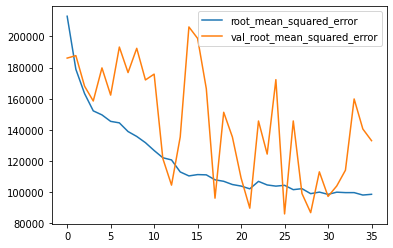

In [32]:
hy[['root_mean_squared_error','val_root_mean_squared_error']].plot()

In [33]:
final_model.evaluate(x_eval,y_eval)

108/108 [==============================] - 1s 3ms/step - loss: 6445521920.0000 - root_mean_squared_error: 80284.0078 - mean_absolute_error: 58953.8828


[6445521920.0, 80284.0078125, 58953.8828125]